Imagine a Vinícola Vale das Uvas, uma empresa dedicada à produção de sucos de frutas de alta qualidade, com especial foco no suco de uva. Localizada nas colinas de uma região famosa por suas vinícolas, a Vinícola enfrenta um desafio significativo: garantir que as folhas das videiras, essenciais para a saúde e o rendimento das uvas, estejam em perfeitas condições.

Recentemente, a Vinícola Vale das Uvas notou variações na qualidade das uvas, que parecem estar ligadas à saúde das folhas das videiras. Folhas saudáveis resultam em uvas de melhor qualidade, enquanto folhas doentes podem comprometer toda a produção.

Para ajudar a Vinícola a identificar rapidamente e com precisão o estado de saúde das folhas das videiras, sua tarefa será desenvolver um modelo de classificação de imagens utilizando redes neurais convolucionais. O modelo deve ser capaz de diferenciar entre folhas saudáveis e não saudáveis a partir de imagens fornecidas pela equipe de campo.

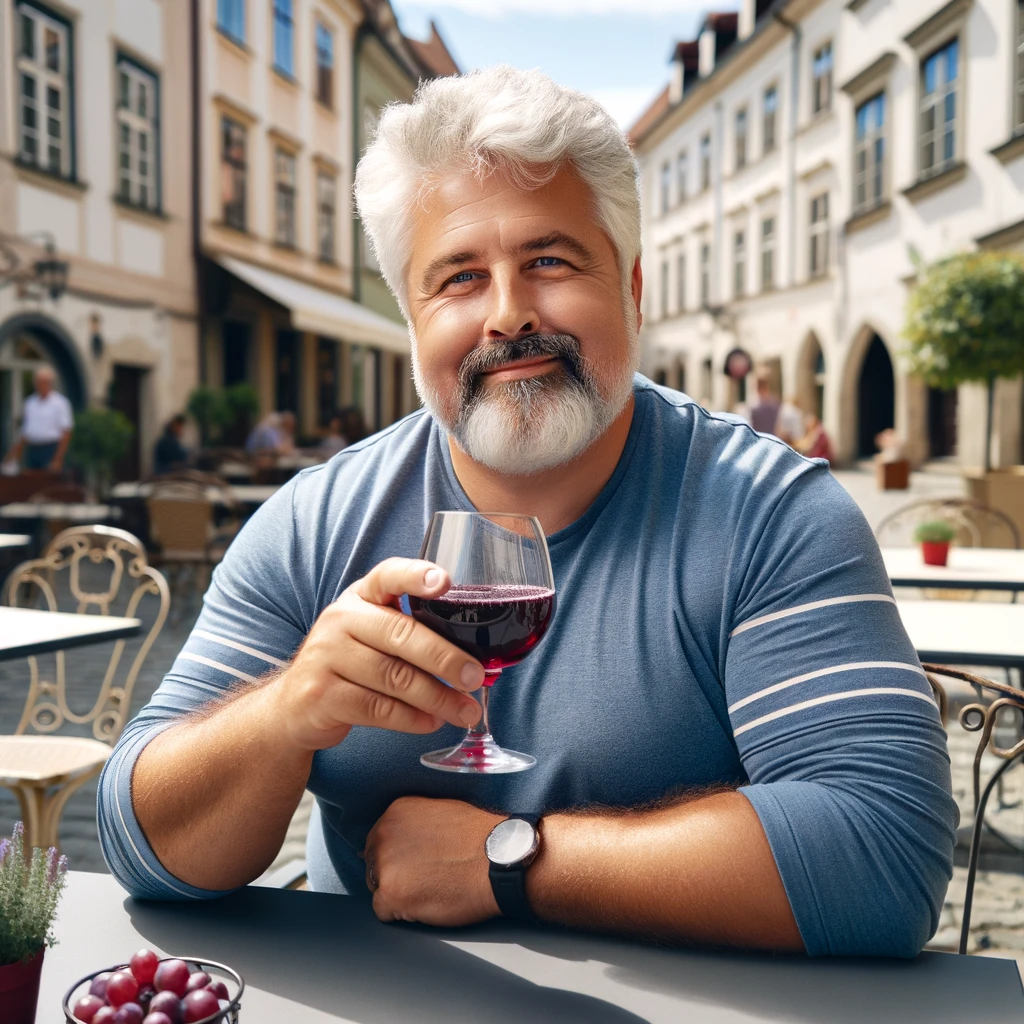

https://www.youtube.com/watch?v=NlpS-DhayQA

# Aula 1 - Preparação de dados e visualização

##  Vídeo 1.2 - Carregando os dados

Importação de datasets de imagens

In [ ]:
# url = '/content/drive/MyDrive/Alura/Cursos/3773 - TensorFlow Keras: Classificando imagens com redes convolucionais/Projeto/uvas'
url = 'dados/uvas'

In [ ]:
import pathlib

In [ ]:
data_dir=pathlib.Path(url)

In [ ]:
len(list(data_dir.glob('*/*.JPG')))

In [ ]:
# Lista todas as subpastas (e arquivos, se houver) no diretório especificado
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

In [ ]:
from PIL import Image

In [ ]:
leafblight = list(data_dir.glob('LeafBlight/*'))

In [ ]:
Image.open(str(leafblight[0]))

## Vídeo 1.3 - Exploração e Visualização de dados

Compreendendo as dimensões e canais de cores

In [ ]:
import numpy as np

In [ ]:
# Verificando o número de imagens por classe e obtendo informações de uma imagem exemplo
for subfolder in subfolders:
    path = data_dir / subfolder
    images = list(path.glob('*.JPG'))
    print(f"Classe '{subfolder}' tem {len(images)} imagens.")

    # Verificando as dimensões e canais de uma imagem exemplo
    if images:
        img = Image.open(str(images[0]))
        img_array = np.array(img)
        print(f"Dimensões da primeira imagem em '{subfolder}': {img_array.shape}")

- RGB (255,0,0) representa o vermelho puro.
- RGB (0,255,0) representa o verde puro.
- RGB (0,0,255) representa o verde puro.

- RGB (0, 0, 0) é preto porque não há luz sendo emitida.
- RGB (255, 255, 255) é branco porque todos os canais estão emitindo luz no máximo, combinando luz vermelha, verde e azul para criar luz branca.

## Vídeo 1.4 - Carregando os dados com o Tensorflow

In [ ]:
batch_size = 64
altura = 256
largura = 256

In [ ]:
import tensorflow as tf

In [ ]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

In [ ]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

In [ ]:
treino.class_names

# Aula 2 - Treinando e melhorando a rede

## Vídeo 2.1 - Montando um perceptron de múltiplas camadas

In [ ]:
tf.random.set_seed(42)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

- [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): Define uma sequência de camadas na rede neural;
- [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling): Camada de processamento que reescala os valores de entrada para um novo intervalo;
- [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): O método Flatten pega a matriz tridimensional das imagens que tinha o tamanho de 256x256x3 originalmente e passa para o formato de um array unidimensinal com 196608 valores neste caso; Isso porque o resultado da multiplicação 256x256x3 é igual 196608;
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): Adiciona uma camada de neurônios;
- [ReLU](https://www.tensorflow.org/api_docs/python/tf/nn/relu): Função de ativação que realiza o seguinte processo na saída de cada neurônio:

Se x > 0: retorna x;
Do contrário: retorna 0;

Em outras palavras, apenas passa valores maiores que zero para próxima camada.

- [Softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax): Função de ativação que pega uma lista de valores e os dimensiona para que a soma de todos os elementos seja igual a 1. Quando aplicado aos resultados do modelo, você pode pensar nos valores dimensionados como a probabilidade para aquela classe. Por exemplo, em seu modelo de classificação que possui 4 unidades na camada densa de saída, ter o valor mais alto no índice = 3 significa que o modelo está mais confiante de que a imagem de entrada seja da classe LeafBlight.

In [ ]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

## Vídeo 2.2 - Treinando o modelo

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
epocas = 20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

In [ ]:
modelo.summary()

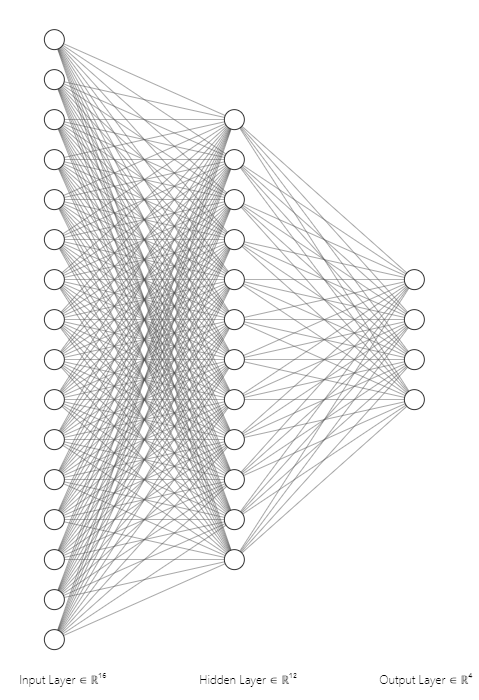

## Vídeo 2.3 - Verificando os resultados

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()


In [ ]:
plota_resultados(history,epocas)